In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [6]:
#df=pd.read_csv("trend_data.csv",parse_dates=['dates'])
df=pd.read_csv("trend_data.csv")
df.head()

,dates,sales
0,2018-01-01,226.405235
1,2018-01-02,316.420955
2,2018-01-03,464.294754
3,2018-01-04,738.384074
4,2018-01-05,975.139873


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dates   365 non-null    object 
 1   sales   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [8]:
df['dates']=pd.to_datetime(df['dates'])
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dates   365 non-null    datetime64[ns]
 1   sales   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [9]:
#df['dates']=df['dates'].astype('datetime64[ns]')

In [12]:
df.set_index('dates',inplace=True)
df.head()

,sales
dates,
2018-01-01,226.405235
2018-01-02,316.420955
2018-01-03,464.294754
2018-01-04,738.384074
2018-01-05,975.139873


In [13]:
df.loc['2018-01-01']

sales    226.405235
Name: 2018-01-01 00:00:00, dtype: float64

<Axes: xlabel='dates'>

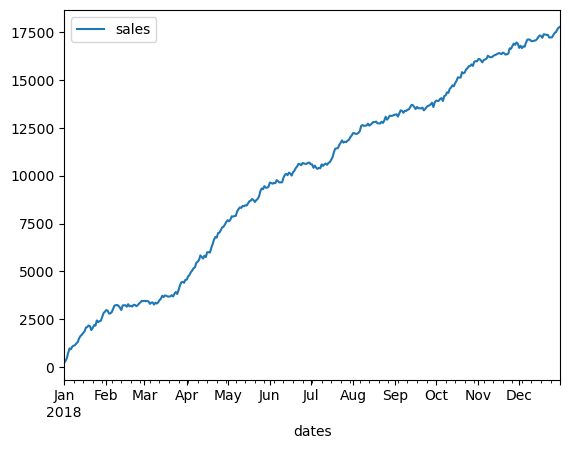

In [14]:
df.plot()

In [15]:
test_result=adfuller(df['sales'])

"""
p>5 --- non-stationary
apply diff
p<5 --- stationary
"""
#null hypothesis - data is non-stationary
#alternate hypothesis - data is stationary
#p<5% or 0.05 then reject null hypothesis otherwise fail to reject the null hypo. i.e. data is non-st.

In [16]:
test_result

(-1.9499300655876344,
 0.3089489501212568,
 0,
 364,
 {'1%': -3.4484434475193777,
  '5%': -2.869513170510808,
  '10%': -2.571017574266393},
 4172.7311189449865)

In [17]:
test_result[1]

0.3089489501212568

In [18]:
df.head()

,sales
dates,
2018-01-01,226.405235
2018-01-02,316.420955
2018-01-03,464.294754
2018-01-04,738.384074
2018-01-05,975.139873


In [19]:
df=df.diff()
df.head()

,sales
dates,
2018-01-01,NaN
2018-01-02,90.015721
2018-01-03,147.873798
2018-01-04,274.089320
2018-01-05,236.755799


In [22]:
df.dropna(axis=0,inplace=True)
df.head()

,sales
dates,
2018-01-02,90.015721
2018-01-03,147.873798
2018-01-04,274.089320
2018-01-05,236.755799
2018-01-06,-47.727788


In [23]:
df.shape

(364, 1)

In [24]:
test_result=adfuller(df)
test_result

(-19.662594477981518,
 0.0,
 0,
 363,
 {'1%': -3.448493650810824,
  '5%': -2.8695352280356556,
  '10%': -2.5710293341377715},
 4161.542682824756)

In [25]:
test_result[1]

0.0

<Axes: xlabel='dates'>

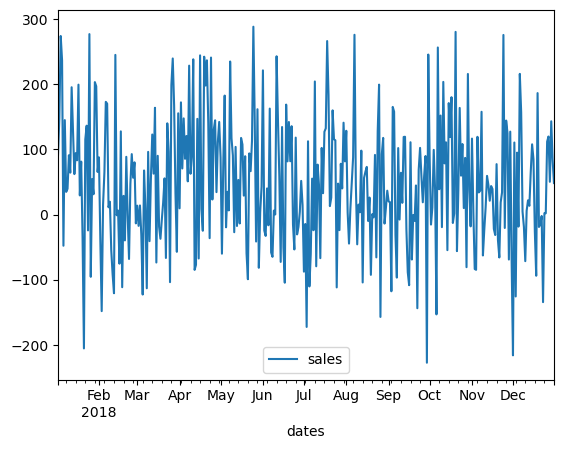

In [26]:
df.plot()

In [67]:
df2=pd.read_csv("AirPassengers.csv")

In [68]:
df2

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [69]:
df2.set_index('Month',inplace=True)

In [70]:
df2

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


<Axes: xlabel='Month'>

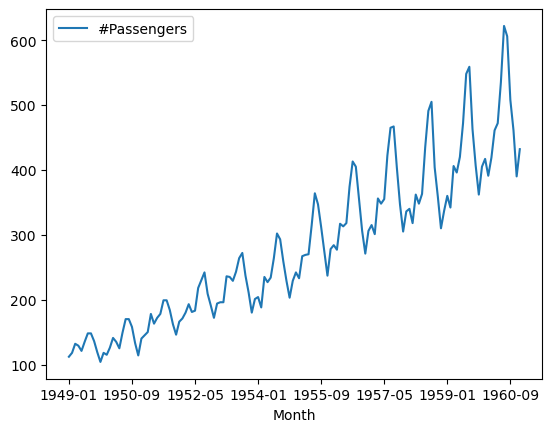

In [71]:
df2.plot()

In [72]:
test_result=adfuller(df2)
test_result[1]

0.9918802434376411

In [73]:
df2.head(10)

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136


In [74]:
df2=df2.diff(periods=4)

In [75]:
df2.head(10)

,#Passengers
Month,
1949-01,NaN
1949-02,NaN
1949-03,NaN
1949-04,NaN
1949-05,9.0
1949-06,17.0
1949-07,16.0
1949-08,19.0
1949-09,15.0


In [76]:
df2.dropna(axis=0,inplace=True)

In [77]:
df2

,#Passengers
Month,
1949-05,9.0
1949-06,17.0
1949-07,16.0
1949-08,19.0
1949-09,15.0
...,...
1960-08,145.0
1960-09,36.0
1960-10,-74.0


In [78]:
test_result=adfuller(df2)
test_result[1]

0.03227809309801943

<Axes: xlabel='Month'>

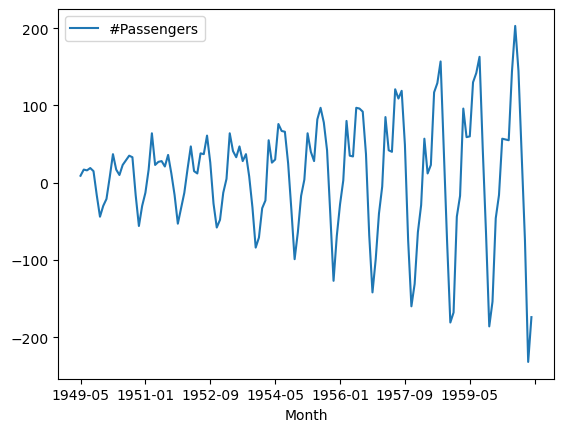

In [79]:
df2.plot()

C:\Users\nilay\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Month'>

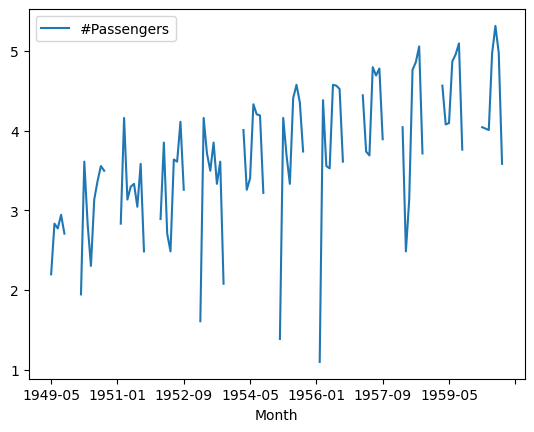

In [83]:
df2['#Passengers']=np.log(df2['#Passengers'])
df2.plot()

In [ ]:
A p-value is a statistical measurement used to validate a hypothesis against observed data.
A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true.
The lower the p-value, the greater the statistical significance of the observed difference.
A p-value of 0.05 or lower is generally considered statistically significant.